In [13]:
import math
import numpy as np
import torch
import random
from d2l import torch as d2l

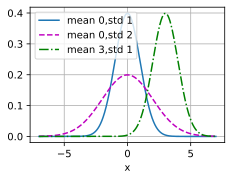

In [10]:
#定义正态分布
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma*sigma)
    return p*np.exp(-0.5/sigma**2 *(x-mu)**2)

x=np.arange(-7,7,0.01)
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],
xlabel='x',legend=[f'mean {mu},std {sigma}' for mu,sigma in params ])

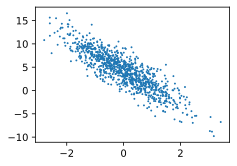

In [12]:
#制造数据集 y=Xw+b+噪声
def synthetic_data(w, b, num_examples): 
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [15]:
#如何获取小批量的X，y
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n',y)

tensor([[ 1.8904,  0.6517],
        [ 0.2878,  1.1568],
        [-1.2284,  0.7716],
        [-0.5926,  0.7611],
        [ 0.5113,  1.4086],
        [-0.6004,  1.1176],
        [ 0.2777, -0.2618],
        [ 0.8008,  0.4204],
        [ 1.3722,  1.9000],
        [ 0.5988, -1.9673]]) 
 tensor([[ 5.7684],
        [ 0.8388],
        [-0.8738],
        [ 0.4161],
        [ 0.4526],
        [-0.7872],
        [ 5.6452],
        [ 4.3711],
        [ 0.4827],
        [12.1029]])
tensor([[-1.3045,  0.0536],
        [-0.0358,  0.4679],
        [ 1.0333, -0.5849],
        [-0.4327, -0.6816],
        [-1.4051, -1.0504],
        [-1.3047, -1.2869],
        [-1.3150, -0.0428],
        [-1.7907, -0.6348],
        [-1.1425,  1.3036],
        [ 0.1575, -0.7065]]) 
 tensor([[ 1.4063],
        [ 2.5350],
        [ 8.2570],
        [ 5.6542],
        [ 4.9374],
        [ 5.9815],
        [ 1.7120],
        [ 2.7916],
        [-2.5221],
        [ 6.9066]])
tensor([[ 1.8411,  0.8666],
        [ 0.5624,  0.441

In [19]:
#初始化w,b
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [21]:
#定义模型wx+b
def liner(X,w,b):
    return torch.matmul(X,w)+b

In [22]:
#定义均方损失
def squared_loss(y_hat, y): 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [23]:
lr = 0.03
num_epochs = 3
net = liner
loss = squared_loss

In [ ]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的⼩批量损失
        # 因为l形状是(batch_size,1)，⽽不是⼀个标量。l中的所有元素被加到⼀起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使⽤参数的梯度更新参数
        with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')